# Objectiv:- Wants to prepare a prediction model for predicting Price using specific column

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [159]:
 toyota= pd.read_csv('D:\\Data sets\\ToyotaCorolla.csv', engine='python') ##Loding the dataset

In [160]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [161]:
toyota.rename(columns={"Age_08_04":"age","Quarterly_Tax":"qtax"},inplace=True) 

# After change the column name  we will select the independent variable whatever we want to predict the price 

In [162]:
toyota1=toyota[["Price","age","KM","HP","cc","Doors","Gears","qtax","Weight"]]


In [6]:
toyota1.shape

(1436, 9)

In [7]:
toyota1.head()

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
toyota1.info() ##No null value present in these columns & all datatype is appropriate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   qtax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
toyota1.corr() ##Correlation b/w all attributes ,we have seen our independent variable don't have much collinearity

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


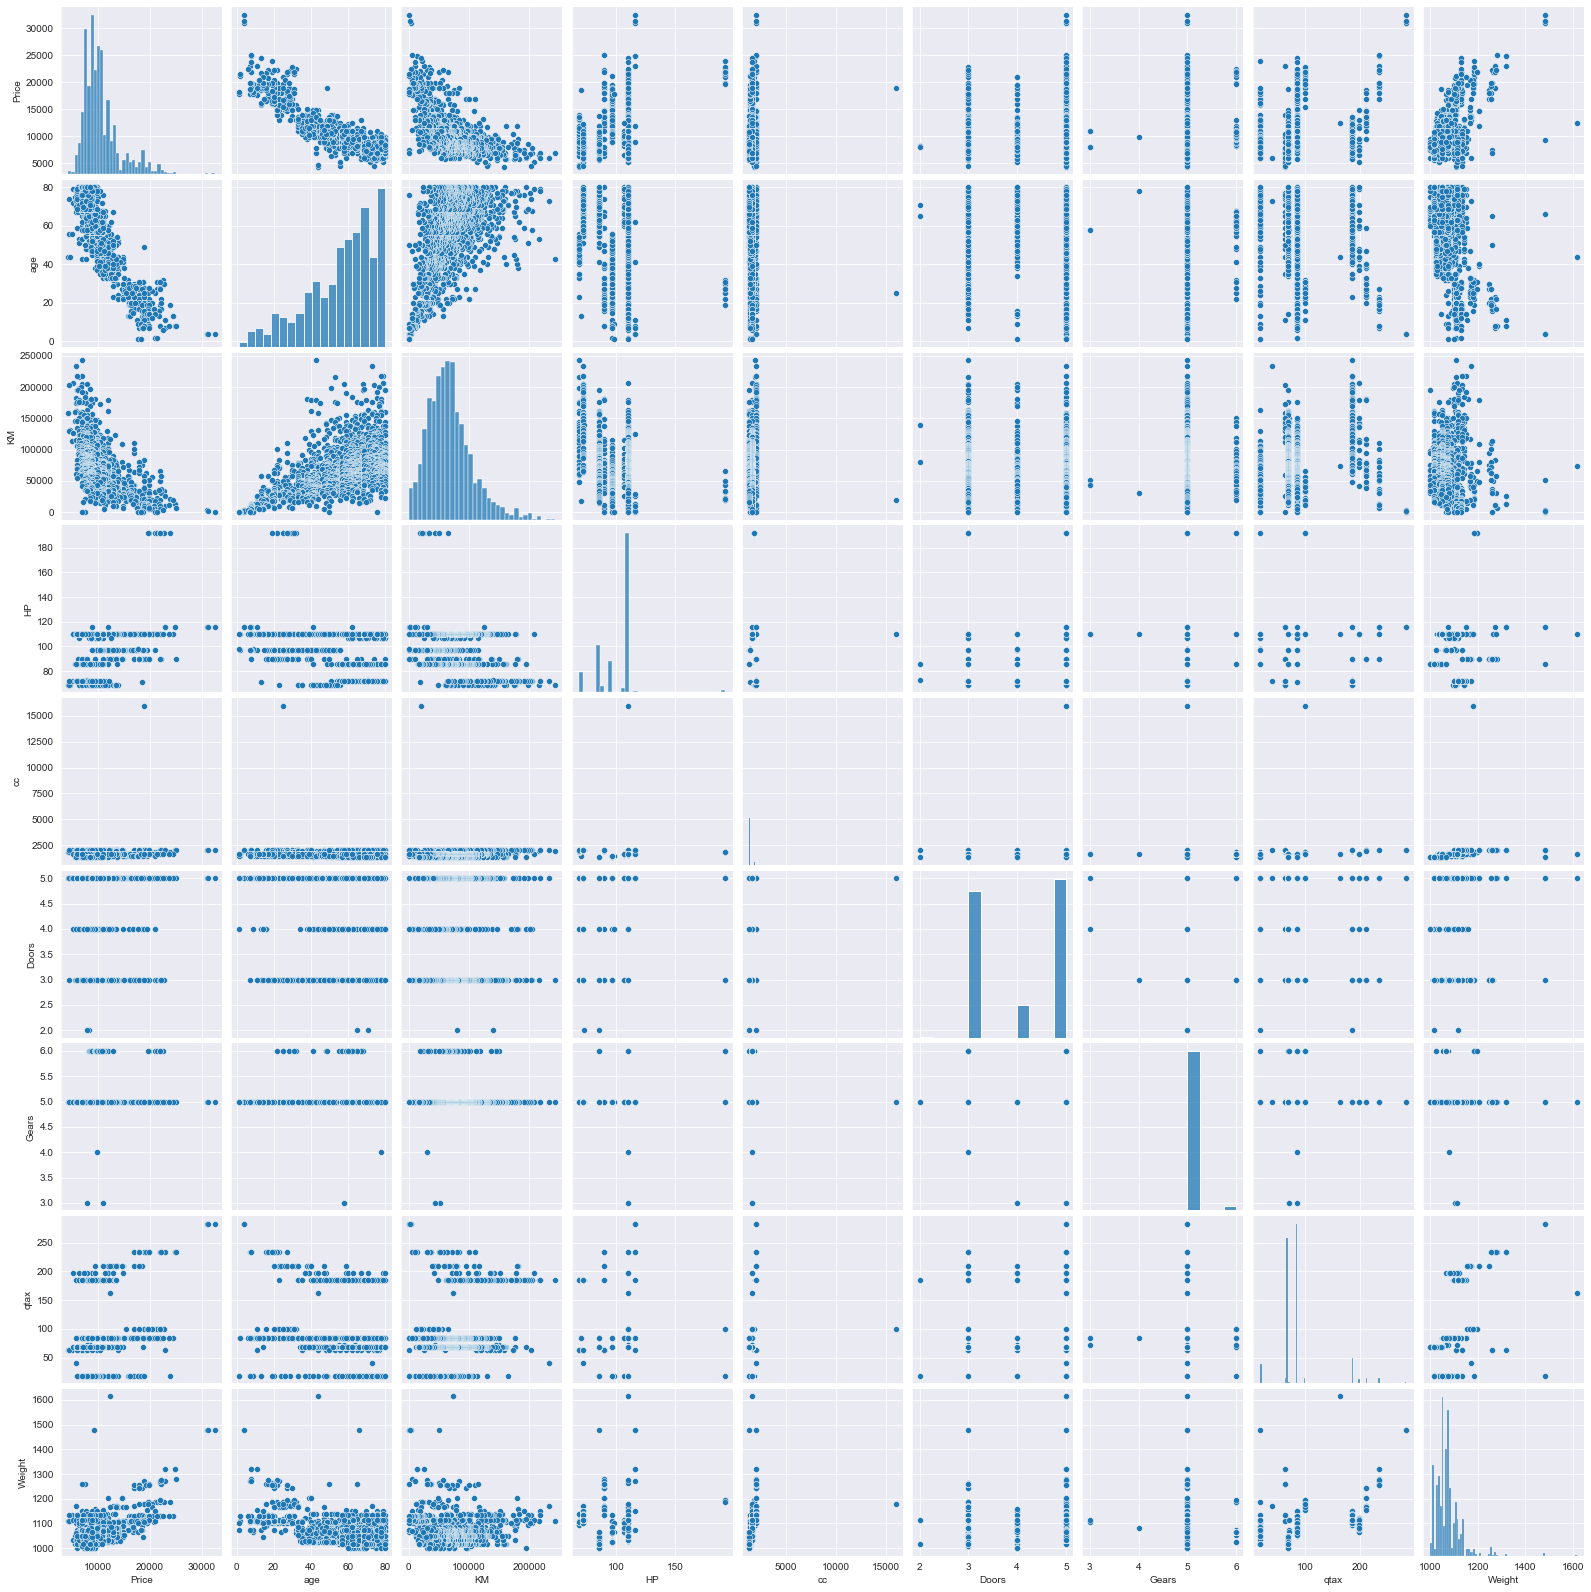

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)                 ##Pair plot

# Create First Model
**We will create a simple model**


In [168]:
model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data=toyota1).fit()

In [169]:
model1.summary() #We can see probability value of cc is 0.179(greater than 0.05) means it is insignificant
#We can see probability value of Doors is 0.968(greater than 0.05) means it is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:10:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qtax           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear regression 
**We will check the regression of CC & Doors saperately with price data**

In [15]:
model_cd=smf.ols("Price~cc+Doors",data=toyota1).fit() ##Doesn't see any changes with using both together

In [16]:
model_cd.pvalues

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [17]:
model_D=smf.ols("Price~Doors",data=toyota1).fit()

In [18]:
model_D.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [19]:
model_c=smf.ols("Price~cc",data=toyota1).fit()

In [20]:
model_c.pvalues 

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

# We will see our data is relible or not with using cook & influnce plot

In [181]:
model1_influence = model1.get_influence()
(c,_ ) = model1_influence.cooks_distance

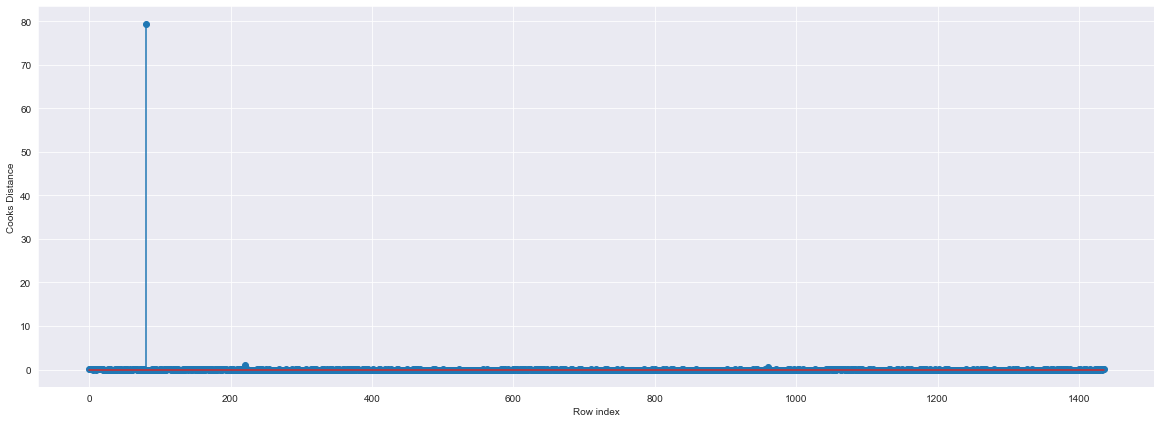

In [182]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota1)), np.round(c,3 ))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
#index and value of influencer where c is more than .1
(np.argmax(c),np.max(c))

(80, 79.52010624141805)

# We will check high Influence points with leverage influence plot

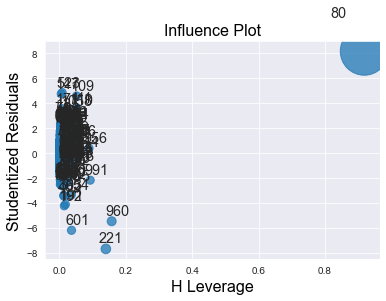

<Figure size 432x288 with 0 Axes>

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plot=plt.figure()

In [171]:
##Laverage calculation
k = toyota1.shape[1]
n = toyota1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [172]:
toyota1[toyota1.index.isin([991,960,80,221])] ##Remove the high influence indexes

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480
991,7950,58,43000,110,1600,4,3,72,1114


In [173]:
toyota1.head()

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [174]:
toyota2=toyota1.drop(toyota1.index[[991,221,960,80]],axis=0).reset_index()

In [175]:
toyota2=toyota2.drop(['index'],axis=1)

In [176]:
toyota2

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


# Improving the model by  using toyota2 data
**model2**

In [177]:
model2= smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data =toyota2).fit()

In [202]:
(model2.rsquared,model2.aic) ##Rsquare is greater & AIC value is less than model1 for better result we will check the infulence in model2

(0.8858347659495055, 24444.93252825725)

# Now we will check influence in model2

In [203]:
model2_influence = model2.get_influence()
(c_f, _) = model2_influence.cooks_distance

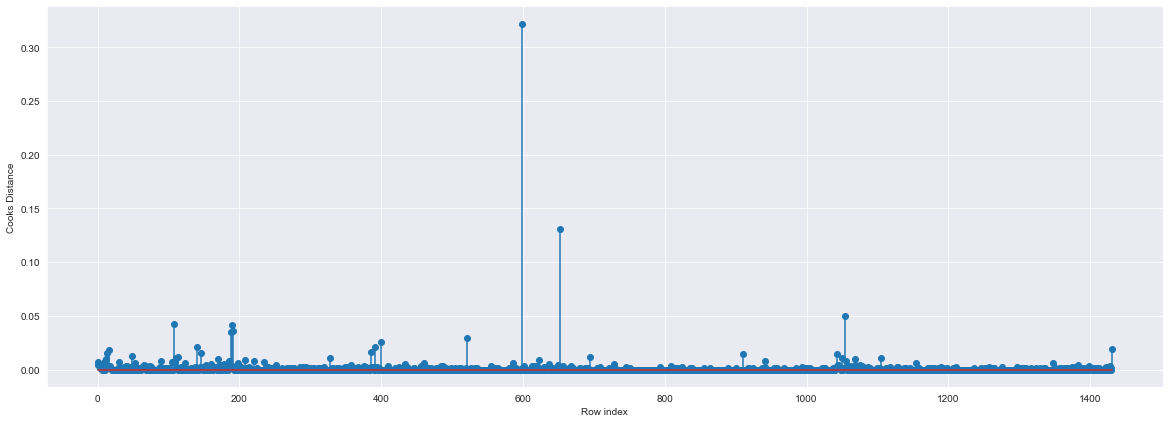

In [204]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c_f,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [205]:
#index and value of influencer where c is more than .1
(np.argmax(c_f),np.max(c_f))

(599, 0.32199526200525586)

In [206]:
toyota3=toyota2.drop(toyota2.index[[599]],axis=0) ##Remove the influence value

In [207]:
toyota3

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [208]:
toyota4=toyota3.reset_index()

In [209]:
toyota5=toyota4.drop(['index'],axis=1)

In [210]:
toyota5

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Improve the model by using toyota5(new data)
**model3**

In [211]:
model3= smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data =toyota5).fit()

In [45]:
model3.summary() ##Rsquare is greater & AIC value is less than model2 for better result we will check normality of error

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:56:09   Log-Likelihood:                -12178.
No. Observations:                1431   AIC:                         2.437e+04
Df Residuals:                    1422   BIC:                         2.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.556e+04   1429.703    -10.882      0.000   -1.84e+04   -1.28e+04
age         -110.0880      2.438    -45.162      0.000    -114.870    -105.306
KM            -0.0177      0.001    -15.002      0.000      -0.020      -0.015
HP            34.8754      2.711     12.867      0.000      29.558      40.192
cc            -3.7072      0.296    -12.521      0.000      -4.288      -3.126
Doors       -152.8163     36.898     -4.142      0.000    -225.197     -80.435
Gears        295.5956    185.706      1.592      0.112     -68.692     659.883
qtax           3.6281      1.358      2.672      0.008       0.965       6.291
Weight        32.4236      1.282     25.296      0.000      29.909      34.938
==============================================================================
Omnibus:                       76.133   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.001
Skew:                           0.130   Prob(JB):                     9.46e-57
Kurtosis:                       5.064   Cond. No.                     3.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We will check errors are normally distributed or not in our model3

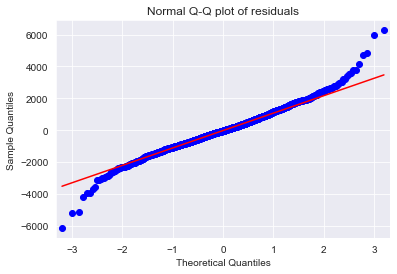

In [212]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [213]:
list(np.where(model3.resid>4000)) 

[array([ 124,  146,  170,  521, 1053], dtype=int64)]

In [214]:
list(np.where(model3.resid<-4000))

[array([190, 191, 391, 651], dtype=int64)]

In [215]:
##Residuals which are not following normallity we will remove from our dataset
toyota6=toyota5.drop(toyota5.index[[ 124,  146,  170,  521,190, 191, 391, 651]],axis=0)

In [216]:
toyota7=toyota6.reset_index()

In [217]:
toyota8=toyota7.drop(['index'],axis=1)

In [218]:
toyota8

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1418,7500,69,20544,86,1300,3,5,69,1025
1419,10845,72,19000,86,1300,3,5,69,1015
1420,8500,71,17016,86,1300,3,5,69,1015
1421,7250,70,16916,86,1300,3,5,69,1015


# Now we will create final model without using any transformation with the help of our new toyota8 dataset
**model_new**

In [222]:
model_new=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data =toyota8).fit()

In [220]:
model_new.summary() ##Rsquare is greater than & AIC value is less than model3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1569.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:57:39   Log-Likelihood:                -12029.
No. Observations:                1423   AIC:                         2.408e+04
Df Residuals:                    1414   BIC:                         2.412e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.69e+04   1369.714    -12.341      0.000   -1.96e+04   -1.42e+04
age         -109.1049      2.323    -46.976      0.000    -113.661    -104.549
KM            -0.0169      0.001    -15.164      0.000      -0.019      -0.015
HP            30.9316      2.607     11.864      0.000      25.817      36.046
cc            -3.5134      0.281    -12.492      0.000      -4.065      -2.962
Doors       -158.3673     35.097     -4.512      0.000    -227.216     -89.519
Gears        338.0128    175.604      1.925      0.054      -6.459     682.485
qtax           1.4803      1.329      1.114      0.266      -1.127       4.088
Weight        33.6694      1.238     27.191      0.000      31.240      36.098
==============================================================================
Omnibus:                       13.399   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.768
Skew:                           0.112   Prob(JB):                     0.000139
Kurtosis:                       3.500   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We will calculate the mean error value

In [246]:
np.sqrt(np.mean(toyota8.Price-model_new.predict(toyota8))**2) ##Mean error approx to zero


2.9704621053828964e-10

# We will check the homoscedasticity in our final model 

In [226]:
def get_standrized_values(vals):
    return (vals-vals.mean())/vals.std()

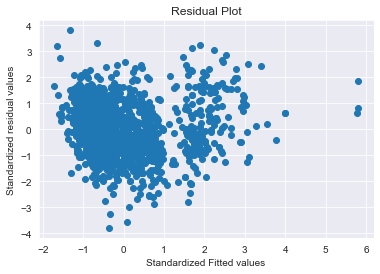

In [227]:
plt.scatter(get_standardized_values(model_new.fittedvalues),
            get_standardized_values(model_new.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()      ##Errors is following approximately homoscedasticity

# We will use transformation for better result
**Greater the R-square & Adj_rsquare value better the result**

**After using many transformation cubic transformation give thye better result then we will predict the result by using it**

**final_model**

In [228]:
final_model=smf.ols('Price~np.square(age+KM+cc+Doors+Gears+HP+qtax+Weight)*age+KM+cc+Doors+Gears+HP+qtax+Weight',data =toyota8).fit()

In [230]:
final_model.summary() ##Rsquare is greater & AIC value is less than model_new
##Probability value is significant (less than 0.05) for all independent variables 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1328.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:24:04   Log-Likelihood:                -11992.
No. Observations:                1423   AIC:                         2.401e+04
Df Residuals:                    1412   BIC:                         2.406e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -1.444e+04   1367.964    -10.556      0.000   -1.71e+04   -1.18e+04
np.square(age + KM + cc + Doors + Gears + HP + qtax + Weight)     -1.941e-07    2.9e-08     -6.689      0.000   -2.51e-07   -1.37e-07
age                                                                -121.9355      2.889    -42.208      0.000    -127.603    -116.269
np.square(age + KM + cc + Doors + Gears + HP + qtax + Weight):age  2.737e-09   3.19e-10      8.579      0.000    2.11e-09    3.36e-09
KM                                                                   -0.0128      0.003     -4.072      0.000      -0.019      -0.007
cc                                                                   -3.3282      0.276    -12.060      0.000      -3.870      -2.787
Doors                                                              -147.4026     34.253     -4.303      0.000    -214.594     -80.211
Gears                                                               384.5272    171.276      2.245      0.025      48.544     720.511
HP                                                                   31.2261      2.579     12.108      0.000      26.167      36.285
qtax                                                                  3.5103      1.319      2.662      0.008       0.924       6.097
Weight                                                               31.1741      1.242     25.092      0.000      28.737      33.611
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                8.338
Skew:                           0.074   Prob(JB):                       0.0155
Kurtosis:                       3.344   Cond. No.                     3.00e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  4.,  17.,  61., 194., 369., 398., 220., 113.,  40.,   7.]),
 array([-3948.52046862, -3187.50980084, -2426.49913305, -1665.48846526,
         -904.47779747,  -143.46712968,   617.5435381 ,  1378.55420589,
         2139.56487368,  2900.57554147,  3661.58620926]),
 <BarContainer object of 10 artists>)

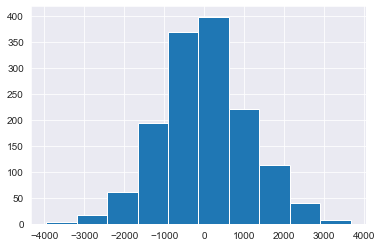

In [233]:
plt.hist(final_model.resid)
##Now we can see our residual/errors follow normal distribution

# Regression plot with all individual independent variables(attributes)

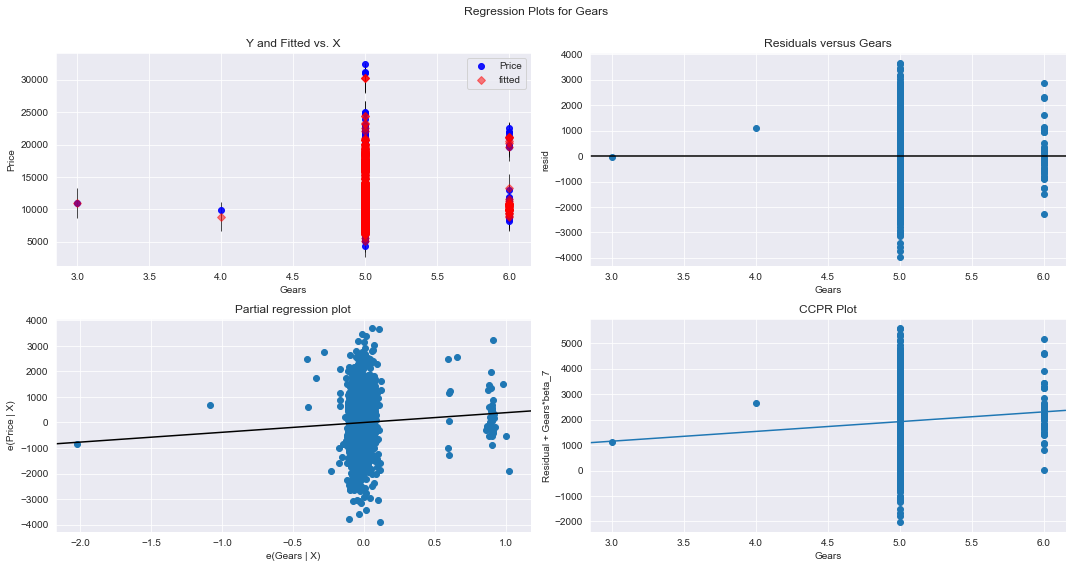

In [236]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "Gears", fig=fig)
plt.show()

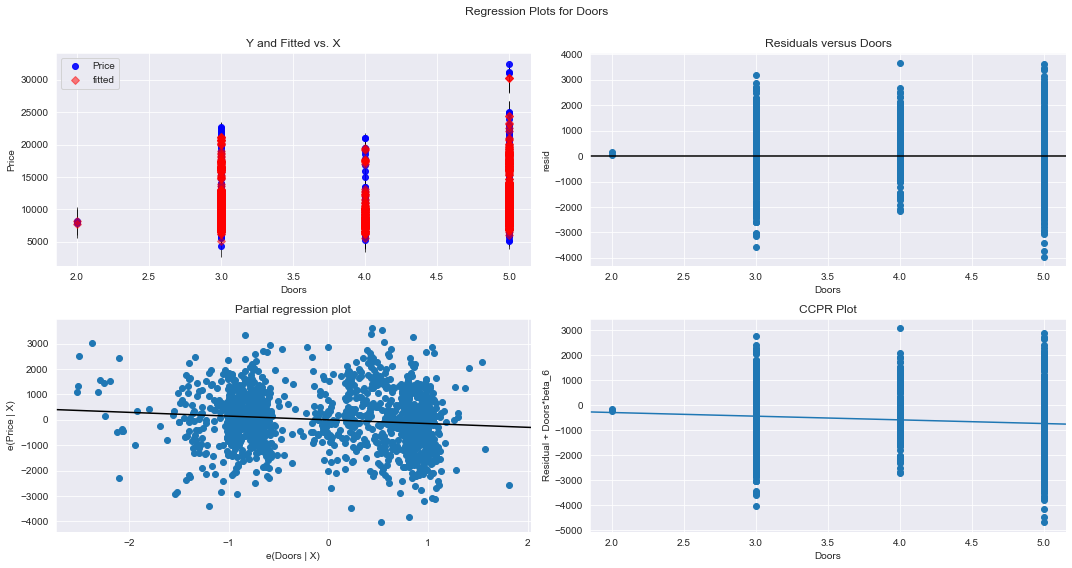

In [237]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "Doors", fig=fig)
plt.show()

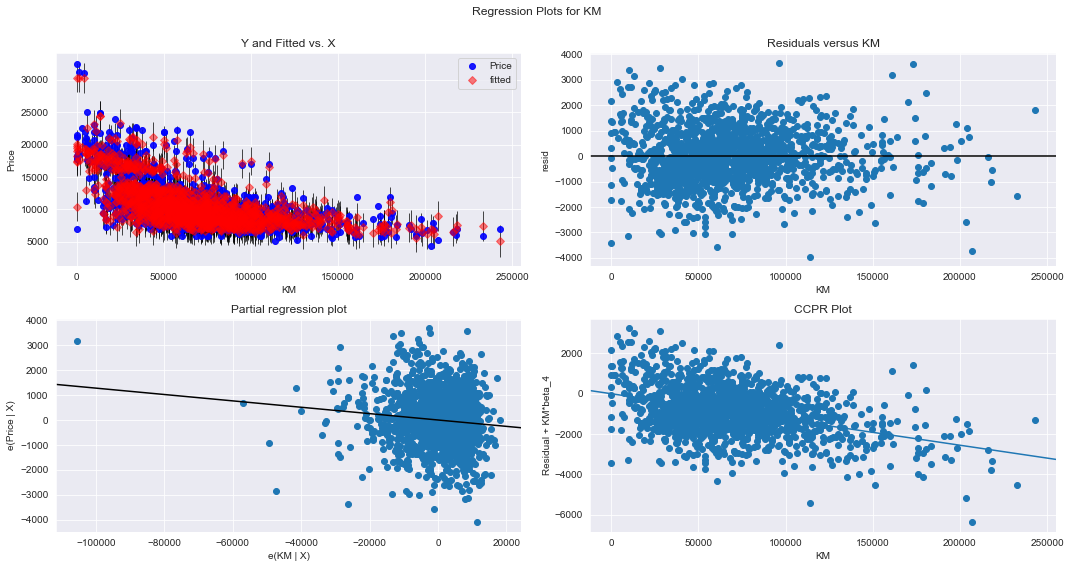

In [238]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "KM", fig=fig)
plt.show()

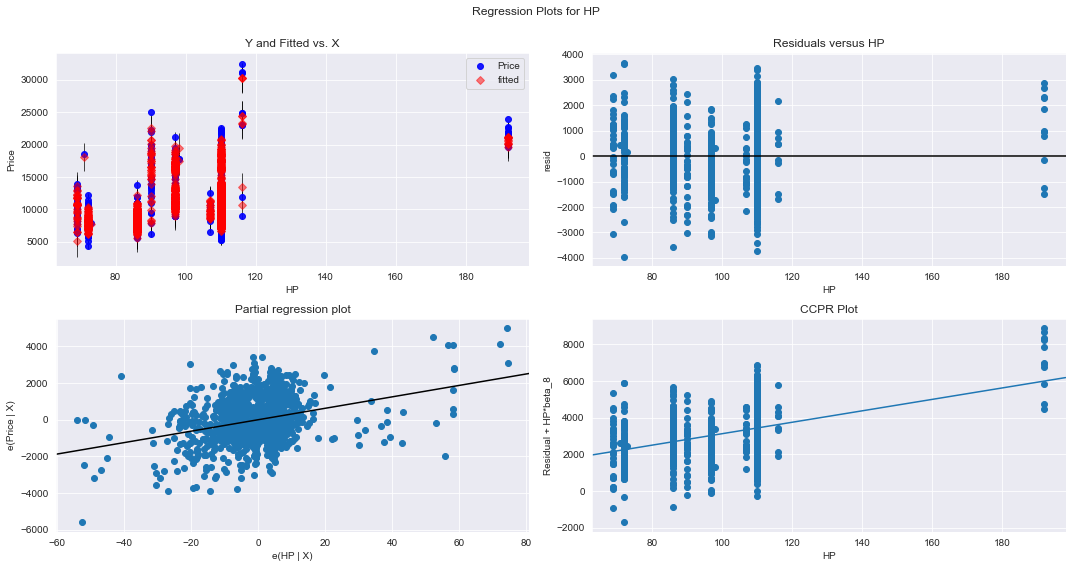

In [239]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "HP", fig=fig)
plt.show()

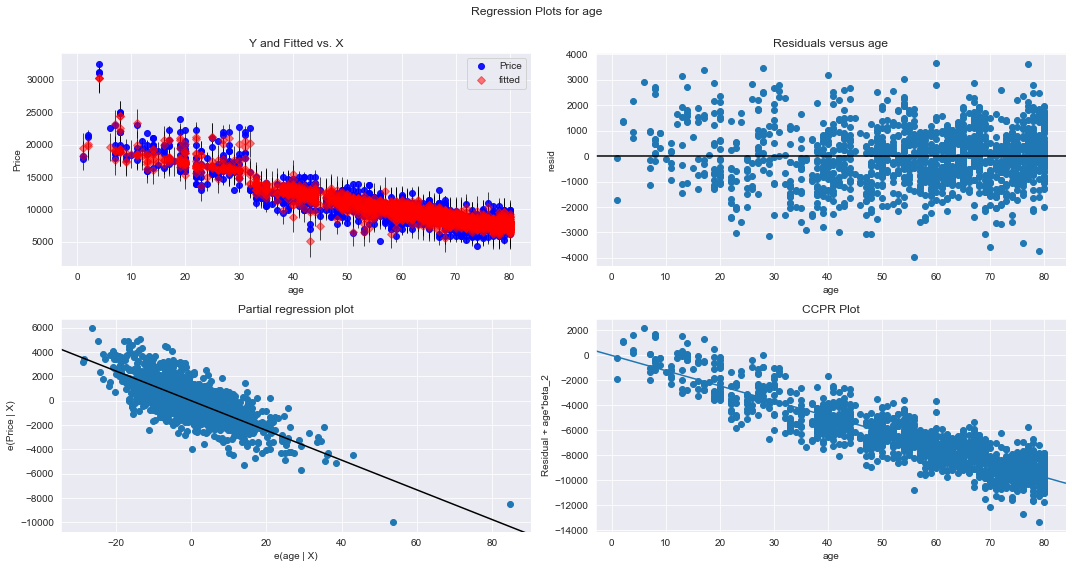

In [240]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "age", fig=fig)
plt.show()

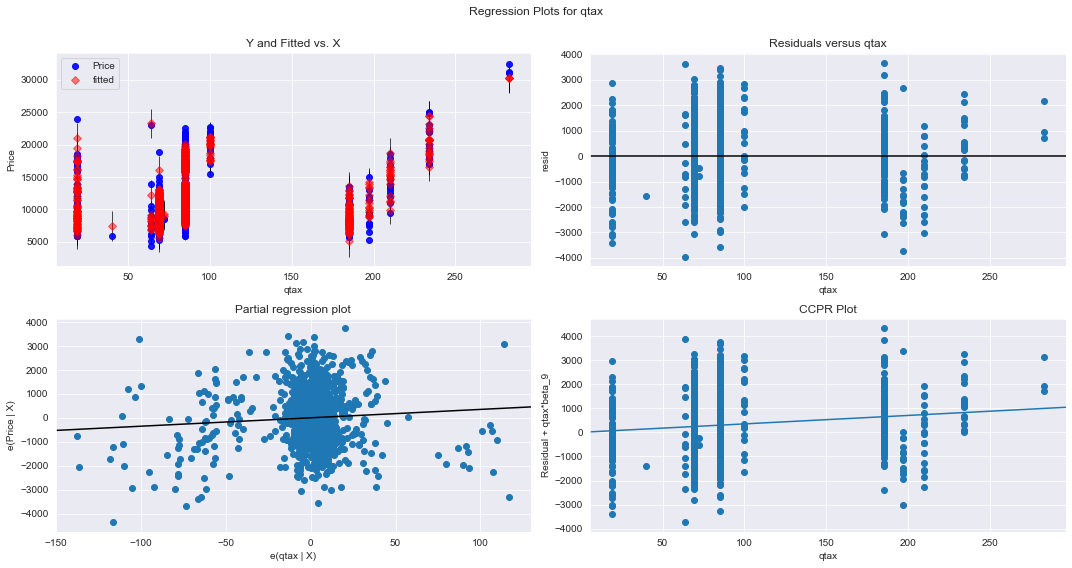

In [241]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "qtax", fig=fig)
plt.show()

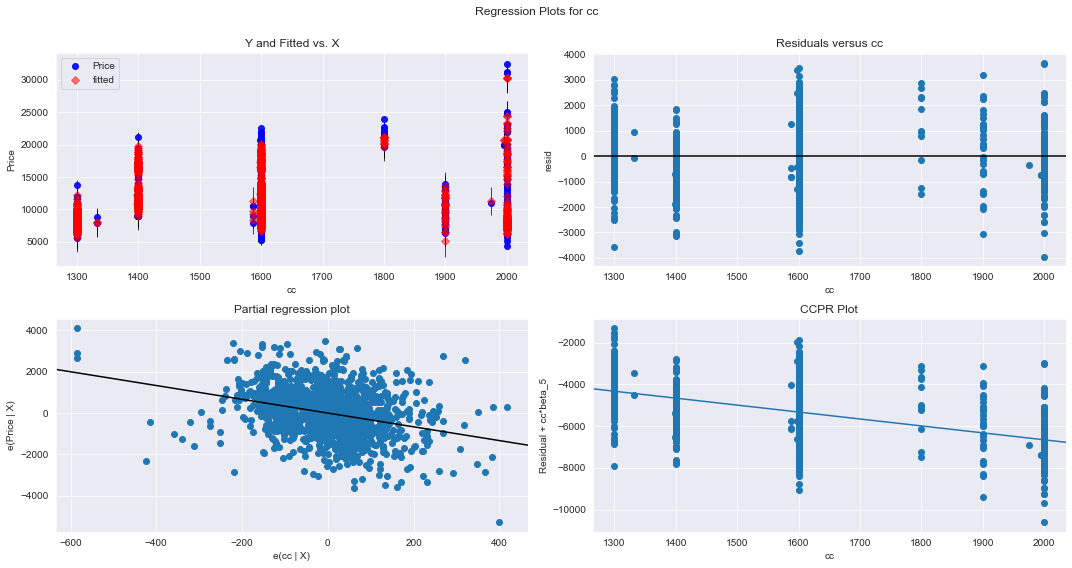

In [242]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "cc", fig=fig)
plt.show()

# Predict car price using final model

In [243]:
final_model.predict(toyota8.iloc[0:5,])

0    16510.702257
1    15747.269768
2    16527.926454
3    16140.120814
4    16058.019483
dtype: float64

# Conclusion:-We will consider the last model (final_model) for price prediction

**R-squared value of final model is 0.904 & Adj_R-square value is 0.903 both are greater than comparison of other model**

**AIC value is 24010 which is less than comparison of other model**

**Probability value is less than 0.05 of all attributes means all attributes are significant**

**Toyota8 is our final dataset for predicted model with 1423 rows & 9 column there are 8 features(indepent varible) & 1 label (dependent varible)**